<a href="https://colab.research.google.com/github/yeswanth464/Zeotap/blob/main/YeswanthReddy_Yerraguntla_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Davies-Bouldin Index: 1.12180191226693


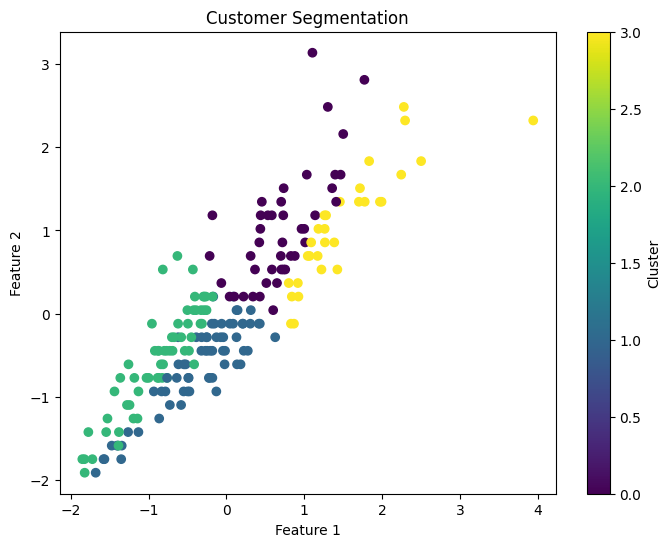

In [16]:

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

transactions = transactions.merge(products, on="ProductID", how="left")
merged_data = transactions.merge(customers, on="CustomerID", how="left")


merged_data = merged_data.drop(columns=["Price_x"])

merged_data = merged_data.rename(columns={"Price_y": "Price"})

customer_features = merged_data.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "Quantity": "sum",
    "Price": "mean"
}).reset_index()

scaler = StandardScaler()
numeric_features = customer_features[["TotalValue", "Quantity", "Price"]]
scaled_features = scaler.fit_transform(numeric_features)

similarity_matrix = cosine_similarity(scaled_features)
customer_ids = customer_features["CustomerID"].tolist()


from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Use the same feature matrix for clustering
scaled_clustering_features = scaled_features

# Perform clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_clustering_features)
customer_features["Cluster"] = clusters

# Evaluate clustering
db_index = davies_bouldin_score(scaled_clustering_features, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    scaled_clustering_features[:, 0],
    scaled_clustering_features[:, 1],
    c=clusters,
    cmap="viridis"
)
plt.title("Customer Segmentation")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

# Save clustering results
customer_features.to_csv("Yeswanth_Yerraguntla_Clustering.csv", index=False)

